In [2]:
from google.colab import drive
drive.mount('content/')

Mounted at content/


In [59]:


# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt



In [61]:
IMAGE_SIZE= [224,224]
train_path = '/content/content/My Drive/ML Datasets/Car Brand/Train'
test_path =  '/content/content/My Drive/ML Datasets/Car Brand/Test'

In [62]:
resnet = ResNet50(input_shape=IMAGE_SIZE + [3],weights= 'imagenet', include_top=False )

In [63]:
resnet.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
___________________________________________________________________________________________

In [64]:
for layer in resnet.layers:
  layer.trainable = False

In [65]:
folders  = glob('/content/content/My Drive/ML Datasets/Car Brand/Train/*')

In [66]:
folders

['/content/content/My Drive/ML Datasets/Car Brand/Train/lamborghini',
 '/content/content/My Drive/ML Datasets/Car Brand/Train/audi',
 '/content/content/My Drive/ML Datasets/Car Brand/Train/mercedes']

In [67]:
x = Flatten()(resnet.output)

In [68]:
prediction = Dense(len(folders), activation = 'softmax')(x)

In [69]:
model = Model(inputs = resnet.input, outputs = prediction)

In [70]:
model.summary()

Model: "functional_5"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
_______________________________________________________________________________________

In [71]:
model.compile(
    loss= 'categorical_crossentropy',
    optimizer = 'adam',
    metrics = ['accuracy']
)

In [72]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale= 1./255 , shear_range=0.2 , zoom_range=0.2 , horizontal_flip= True)

test_datagen  = ImageDataGenerator(rescale = 1./255)

In [73]:
training_set = train_datagen.flow_from_directory('/content/content/My Drive/ML Datasets/Car Brand/Train', 
                                                 target_size= (224,224) , 
                                                 batch_size = 32,
                                                 class_mode = 'categorical'
                                                 
                                                 )





Found 64 images belonging to 3 classes.


In [74]:
test_set = test_datagen.flow_from_directory('/content/content/My Drive/ML Datasets/Car Brand/Test', 
                                                 target_size= (224,224) , 
                                                 batch_size = 32,
                                                 class_mode = 'categorical'
                                                 
                                                 )

Found 58 images belonging to 3 classes.


In [75]:
r = model.fit_generator(training_set,
                        validation_data = test_set,
                        epochs =50,
                        steps_per_epoch = len(training_set),
                        validation_steps = len(test_set)
                  
                        
                        )

Epoch 1/50
2/2 [==============================] - 2s 1s/step - loss: 4.9096 - accuracy: 0.3594 - val_loss: 6.9276 - val_accuracy: 0.5172
Epoch 2/50
2/2 [==============================] - 1s 505ms/step - loss: 8.8404 - accuracy: 0.3750 - val_loss: 4.9912 - val_accuracy: 0.3276
Epoch 3/50
2/2 [==============================] - 1s 515ms/step - loss: 3.3833 - accuracy: 0.3906 - val_loss: 7.8024 - val_accuracy: 0.1552
Epoch 4/50
2/2 [==============================] - 1s 510ms/step - loss: 6.7990 - accuracy: 0.3281 - val_loss: 5.5568 - val_accuracy: 0.1724
Epoch 5/50
2/2 [==============================] - 1s 516ms/step - loss: 6.0880 - accuracy: 0.3281 - val_loss: 5.3453 - val_accuracy: 0.5172
Epoch 6/50
2/2 [==============================] - 1s 516ms/step - loss: 4.4864 - accuracy: 0.3750 - val_loss: 2.0442 - val_accuracy: 0.3276
Epoch 7/50
2/2 [==============================] - 1s 503ms/step - loss: 2.3770 - accuracy: 0.3906 - val_loss: 5.2520 - val_accuracy: 0.3621
Epoch 8/50
2/2 [=======

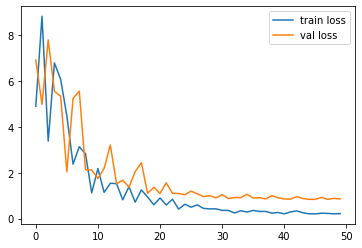

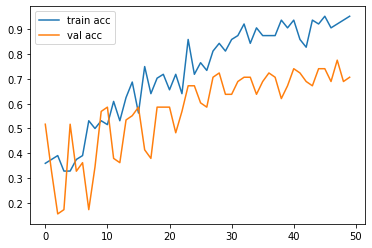

<Figure size 432x288 with 0 Axes>

In [76]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [77]:
from tensorflow.keras.models import load_model 
model.save('/content/content/My Drive/ML Datasets/Car Brand/model2_resnet50.h5')

In [35]:
y_pred = model.predict(test_set)

In [36]:
y_pred


array([[3.56432617e-01, 1.87192054e-04, 6.43380165e-01],
       [2.54663564e-02, 2.79643564e-06, 9.74530876e-01],
       [5.67570210e-01, 2.24430714e-05, 4.32407320e-01],
       [2.99593452e-02, 4.85961031e-08, 9.70040679e-01],
       [4.11906511e-01, 3.10061514e-05, 5.88062465e-01],
       [4.03188765e-01, 2.78069147e-05, 5.96783400e-01],
       [7.37699807e-01, 2.17917363e-06, 2.62297988e-01],
       [4.72787589e-01, 5.92926408e-05, 5.27153134e-01],
       [4.00227904e-01, 1.29448210e-06, 5.99770784e-01],
       [7.37899169e-02, 1.71842896e-06, 9.26208377e-01],
       [6.56112209e-02, 1.36064309e-05, 9.34375167e-01],
       [4.24920097e-02, 6.63541359e-05, 9.57441688e-01],
       [2.69448370e-01, 9.04244371e-05, 7.30461180e-01],
       [3.26368958e-01, 5.98678707e-05, 6.73571169e-01],
       [6.81991458e-01, 1.10702655e-04, 3.17897826e-01],
       [1.30525708e-01, 1.69989635e-05, 8.69457245e-01],
       [3.22559416e-01, 2.17792899e-06, 6.77438378e-01],
       [2.05716752e-02, 4.98492

In [38]:
import numpy as np
y_pred = np.argmax(y_pred, axis =1)

In [39]:
y_pred

array([2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2,
       0, 2, 2, 2, 0, 0, 0, 2, 0, 2, 2, 2, 0, 2])

In [40]:


from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image



In [41]:
model=load_model('model_resnet50.h5')

In [49]:
#img= image.load_img(('/content/content/My Drive/ML Datasets/Car Brand/Test/lamborghini/11.jpg'))

In [50]:
#x= image.img_to_array(img)

TypeError: ignored

(1, 194, 259, 3)